In [15]:
#Import the required Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Cleaning 

### Data Reading & Data Types 

In [16]:
#Read the data in pandas
inp0= pd.read_csv("Attribute+DataSet.csv")
inp1= pd.read_csv("Dress+Sales.csv")

You have “Attribute DataSet” which contains a column named “Price”. Choose the correct statement from the following about its data type and variable type.
- Integer type and numerical variable
- Object type and categorical ordinal variable
- Object type and categorical nominal variable
- Float type and categorical variable.


There is another column in “Attribute DataSet” named as “Recommendation”, choose the correct statement about its data type and variable type.
- Integer type and categorical
- Object type and categorical
- Integer type and continuous numerical
- Object type only.


Which of the following column do you think are of no use in “Attribute DataSet”.
- Dress_ID
- Price
- Size and material
- NeckLine
- None of the above


In [17]:
# Print the information about the attributes of inp0 and inp1.
print(inp0.head(5))
inp1.head(5)

     Dress_ID    Style    Price  Rating Size  Season NeckLine SleeveLength  \
0  1006032852     Sexy      Low     4.6    M  Summer   o-neck    sleevless   
1  1212192089   Casual      Low     0.0    L  Summer   o-neck        Petal   
2  1190380701  vintage     High     0.0    L  Automn   o-neck         full   
3   966005983    Brief  Average     4.6    L  Spring   o-neck         full   
4   876339541     cute      Low     4.5    M  Summer   o-neck    butterfly   

        Material FabricType  Decoration Pattern Type  Recommendation  
0            NaN    chiffon     ruffles       animal               1  
1     microfiber        NaN     ruffles       animal               0  
2       polyster        NaN         NaN        print               0  
3           silk    chiffon  embroidary        print               1  
4  chiffonfabric    chiffon         bow          dot               0  


,Dress_ID,29-08-2013,31-08-2013,09-02-2013,09-04-2013,09-06-2013,09-08-2013,09-10-2013,09-12-2013,14-09-2013,...,24-09-2013,26-09-2013,28-09-2013,30-09-2013,10-02-2013,10-04-2013,10-06-2013,10-08-2013,10-10-2013,10-12-2013
0,1.006033e+09,2114,2274,2491,2660,2727,2887,2930,3119,3204,...,3554,3624.0,3706,3746.0,3795.0,3832.0,3897,3923.0,3985.0,4048
1,1.212192e+09,151,275,570,750,813,1066,1164,1558,1756,...,2710,2942.0,3258,3354.0,3475.0,3654.0,3911,4024.0,4125.0,4277
2,1.190381e+09,6,7,7,7,8,8,9,10,10,...,11,11.0,11,11.0,11.0,11.0,11,11.0,11.0,11
3,9.660060e+08,1005,1128,1326,1455,1507,1621,1637,1723,1746,...,1878,1892.0,1914,1924.0,1929.0,1941.0,1952,1955.0,1959.0,1963
4,8.763395e+08,996,1175,1304,1396,1432,1559,1570,1638,1655,...,2032,2156.0,2252,2312.0,2387.0,2459.0,2544,2614.0,2693.0,2736


### Fixing the Rows and Columns 

As you can see, there is a column in “Attribute Dataset” named as ‘Size’. This column contains the values in abbreviation format. Write a code in Python to convert the followings:

- M into  “Medium”
- L into  “Large”
- XL into “Extra large”
- free into “Free”
- S, s & small into “Small”.

Now once you are done with changes in the dataset, what is the value of the lowest percentage, the highest percentage and the percentage of Small size categories in the column named “Size”?


In [18]:
inp0.dtypes

Dress_ID            int64
Style              object
Price              object
Rating            float64
Size               object
Season             object
NeckLine           object
SleeveLength       object
Material           object
FabricType         object
Decoration         object
Pattern Type       object
Recommendation      int64
dtype: object

In [19]:
# Column fixing, correcting size abbreviation. count the percentage of each size category in "Size" column.
mapping = {'M': 'Medium', 'L': 'Large', 'XL':'Extra large','free': 'Free','s':'Small','S':'Small','small':'Small'}
print(mapping)
inp0['Size'] = inp0['Size'].map(mapping)
inp0.head(5)

{'M': 'Medium', 'L': 'Large', 'XL': 'Extra large', 'free': 'Free', 's': 'Small', 'S': 'Small', 'small': 'Small'}


,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.6,Medium,Summer,o-neck,sleevless,NaN,chiffon,ruffles,animal,1
1,1212192089,Casual,Low,0.0,Large,Summer,o-neck,Petal,microfiber,NaN,ruffles,animal,0
2,1190380701,vintage,High,0.0,Large,Automn,o-neck,full,polyster,NaN,NaN,print,0
3,966005983,Brief,Average,4.6,Large,Spring,o-neck,full,silk,chiffon,embroidary,print,1
4,876339541,cute,Low,4.5,Medium,Summer,o-neck,butterfly,chiffonfabric,chiffon,bow,dot,0


In [20]:
s = inp0.Size
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per': percent, 'percentage': percent100})

,counts,per,percentage
Medium,171,0.356994,35.7%
Free,165,0.344468,34.4%
Large,93,0.194154,19.4%
Small,36,0.075157,7.5%
Extra large,14,0.029228,2.9%


In [21]:
# Print the value counts of each category in "Size" column.
s = inp0.Size
counts = s.value_counts()
print(counts)

Medium         171
Free           165
Large           93
Small           36
Extra large     14
Name: Size, dtype: int64


### Impute/Remove Missing values

In [22]:
# Print the null count of each variables of inp0 and inp1.
inp0.isnull().sum()

Dress_ID            0
Style               0
Price               2
Rating              0
Size                0
Season              2
NeckLine            3
SleeveLength        2
Material          119
FabricType        256
Decoration        224
Pattern Type      102
Recommendation      0
dtype: int64

In [23]:
inp1.isnull().sum()

Dress_ID        0
29-08-2013      0
31-08-2013      0
09-02-2013      0
09-04-2013      0
09-06-2013      0
09-08-2013      0
09-10-2013      0
09-12-2013      0
14-09-2013      0
16-09-2013      0
18-09-2013      0
20-09-2013      0
22-09-2013      0
24-09-2013      0
26-09-2013    222
28-09-2013      0
30-09-2013    257
10-02-2013    259
10-04-2013    258
10-06-2013      0
10-08-2013    255
10-10-2013    255
10-12-2013      0
dtype: int64

You are given another dataset named “Dress Sales”. Now if you observe the datatypes of the columns using ‘inp1.info()’ command, you can identify that there are certain columns defined as object data type though they primarily consist of numeric data.

Now if you try and convert these object data type columns into numeric data type(float), you will come across an error message. Try to correct this error.







In [24]:
# Print the data types information of inp1 i.e. "Dress Sales" data.
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dress_ID    479 non-null    float64
 1   29-08-2013  479 non-null    int64  
 2   31-08-2013  479 non-null    int64  
 3   09-02-2013  479 non-null    int64  
 4   09-04-2013  479 non-null    int64  
 5   09-06-2013  479 non-null    int64  
 6   09-08-2013  479 non-null    int64  
 7   09-10-2013  479 non-null    int64  
 8   09-12-2013  479 non-null    object 
 9   14-09-2013  479 non-null    object 
 10  16-09-2013  479 non-null    object 
 11  18-09-2013  479 non-null    object 
 12  20-09-2013  479 non-null    object 
 13  22-09-2013  479 non-null    object 
 14  24-09-2013  479 non-null    int64  
 15  26-09-2013  257 non-null    float64
 16  28-09-2013  479 non-null    int64  
 17  30-09-2013  222 non-null    float64
 18  10-02-2013  220 non-null    float64
 19  10-04-2013  221 non-null    f

In [25]:
# Try to convert the object type into float type of data. YOU GET ERROR MESSAGE.
inp1 = inp1.astype(float)


ValueError: could not convert string to float: 'Removed'

In [26]:
# Do the required changes in the "Dress Sales" data set to get null values on string values.
inp1.loc[inp1['09-12-2013']== 'Removed',"09-12-2013"] = np.NaN
inp1.loc[inp1['14-09-2013']== 'removed',"14-09-2013"] = np.NaN
inp1.loc[inp1['16-09-2013']== 'removed',"16-09-2013"] = np.NaN
inp1.loc[inp1['18-09-2013']== 'removed',"18-09-2013"] = np.NaN
inp1.loc[inp1['20-09-2013']== 'removed',"20-09-2013"] = np.NaN
inp1.loc[inp1['22-09-2013']== 'Orders',"22-09-2013"] = np.NaN

In [27]:
# Convert the object type columns in "Dress Sales" into float type of data type.
inp1['09-12-2013'] = pd.to_numeric(inp1['09-12-2013'], downcast='float')
inp1['14-09-2013'] = pd.to_numeric(inp1['14-09-2013'], downcast='float')
inp1['16-09-2013'] = pd.to_numeric(inp1['16-09-2013'], downcast='float')
inp1['18-09-2013'] = pd.to_numeric(inp1['18-09-2013'], downcast='float')
inp1['20-09-2013'] = pd.to_numeric(inp1['20-09-2013'], downcast='float')
inp1['22-09-2013'] = pd.to_numeric(inp1['22-09-2013'], downcast='float')

In [28]:
inp1.dtypes

Dress_ID      float64
29-08-2013      int64
31-08-2013      int64
09-02-2013      int64
09-04-2013      int64
09-06-2013      int64
09-08-2013      int64
09-10-2013      int64
09-12-2013    float32
14-09-2013    float32
16-09-2013    float32
18-09-2013    float32
20-09-2013    float32
22-09-2013    float32
24-09-2013      int64
26-09-2013    float64
28-09-2013      int64
30-09-2013    float64
10-02-2013    float64
10-04-2013    float64
10-06-2013      int64
10-08-2013    float64
10-10-2013    float64
10-12-2013      int64
dtype: object

When you see the null counts in “Dress Sales” dataset after performing all the operations that have been mentioned in jupyter notebook, you will find that there are some columns in “Dress Sales” data where there are more than 40% of missing values. Based on your understanding of dealing with missing values do the following steps.

In [30]:
# Print the null percetange of each column of inp1.
pct_null = inp1.isnull().sum()/len(inp1.index) *100

In [31]:
# Drop the columns in "Dress Sales" which have more than 40% of missing values.
missing_features = pct_null[pct_null > 40].index
inp1.drop(missing_features, axis=1, inplace=True)

In [32]:
pct_null = inp1.isnull().sum()/len(inp1.index) *100
pct_null

Dress_ID      0.000000
29-08-2013    0.000000
31-08-2013    0.000000
09-02-2013    0.000000
09-04-2013    0.000000
09-06-2013    0.000000
09-08-2013    0.000000
09-10-2013    0.000000
09-12-2013    0.208768
14-09-2013    0.208768
16-09-2013    0.208768
18-09-2013    0.208768
20-09-2013    0.208768
22-09-2013    0.208768
24-09-2013    0.000000
28-09-2013    0.000000
10-06-2013    0.000000
10-12-2013    0.000000
dtype: float64

You should categorise the dates into seasons in “Dress Sales” data to simplify the analysis according to the following criteria:
- June, July and August: Summer.
- September, October and November: Autumn.
- December, January and February: WInter.
- March, April and May: Spring.




In [33]:
inp1.head(5)

,Dress_ID,29-08-2013,31-08-2013,09-02-2013,09-04-2013,09-06-2013,09-08-2013,09-10-2013,09-12-2013,14-09-2013,16-09-2013,18-09-2013,20-09-2013,22-09-2013,24-09-2013,28-09-2013,10-06-2013,10-12-2013
0,1.006033e+09,2114,2274,2491,2660,2727,2887,2930,3119.0,3204.0,3277.0,3321.0,3386.0,3479.0,3554,3706,3897,4048
1,1.212192e+09,151,275,570,750,813,1066,1164,1558.0,1756.0,1878.0,1985.0,2106.0,2454.0,2710,3258,3911,4277
2,1.190381e+09,6,7,7,7,8,8,9,10.0,10.0,10.0,10.0,10.0,11.0,11,11,11,11
3,9.660060e+08,1005,1128,1326,1455,1507,1621,1637,1723.0,1746.0,1783.0,1796.0,1812.0,1845.0,1878,1914,1952,1963
4,8.763395e+08,996,1175,1304,1396,1432,1559,1570,1638.0,1655.0,1681.0,1743.0,1824.0,1919.0,2032,2252,2544,2736


In [34]:
# Create the four seasons columns in inp1, according to the above criteria.
inp1["Summer"] = inp1['09-06-2013'] + inp1['10-06-2013'] + inp1['29-08-2013'] + inp1['31-08-2013'] + inp1['09-08-2013']
inp1['Autumn'] = inp1['09-10-2013'] + inp1['14-09-2013'] + inp1['16-09-2013'] + inp1['18-09-2013'] + inp1['20-09-2013'] + inp1['22-09-2013'] + inp1['24-09-2013'] + inp1['28-09-2013']
inp1['Winter'] = inp1['09-12-2013'] + inp1['10-12-2013'] + inp1['09-02-2013']
inp1['Spring'] = inp1['09-04-2013']

In [35]:
inp1.head(5)

,Dress_ID,29-08-2013,31-08-2013,09-02-2013,09-04-2013,09-06-2013,09-08-2013,09-10-2013,09-12-2013,14-09-2013,...,20-09-2013,22-09-2013,24-09-2013,28-09-2013,10-06-2013,10-12-2013,Summer,Autumn,Winter,Spring
0,1.006033e+09,2114,2274,2491,2660,2727,2887,2930,3119.0,3204.0,...,3386.0,3479.0,3554,3706,3897,4048,13899,26857.0,9658.0,2660
1,1.212192e+09,151,275,570,750,813,1066,1164,1558.0,1756.0,...,2106.0,2454.0,2710,3258,3911,4277,6216,17311.0,6405.0,750
2,1.190381e+09,6,7,7,7,8,8,9,10.0,10.0,...,10.0,11.0,11,11,11,11,40,82.0,28.0,7
3,9.660060e+08,1005,1128,1326,1455,1507,1621,1637,1723.0,1746.0,...,1812.0,1845.0,1878,1914,1952,1963,7213,14411.0,5012.0,1455
4,8.763395e+08,996,1175,1304,1396,1432,1559,1570,1638.0,1655.0,...,1824.0,1919.0,2032,2252,2544,2736,7706,14676.0,5678.0,1396


In [36]:
# calculate the sum of sales in each seasons in inp1 i.e. "Dress Sales".
inp1[['Summer','Autumn','Winter','Spring']].sum()

Summer     691907.0
Autumn    1353543.0
Winter     473640.0
Spring     143600.0
dtype: float64

Now let's merge inp1 with inp0 with left join manner, so that the information of inp0 should remain intact.

In [37]:
# Merge inp0 with inp1 into inp0. this is also called left merge.
inp0 = pd.merge(left=inp0,right=inp1, how='left', left_on='Dress_ID', right_on='Dress_ID')
inp0.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Material,FabricType,...,20-09-2013,22-09-2013,24-09-2013,28-09-2013,10-06-2013,10-12-2013,Summer,Autumn,Winter,Spring
0,1006032852,Sexy,Low,4.6,Medium,Summer,o-neck,sleevless,NaN,chiffon,...,3386.0,3479.0,3554,3706,3897,4048,13899,26857.0,9658.0,2660
1,1212192089,Casual,Low,0.0,Large,Summer,o-neck,Petal,microfiber,NaN,...,2106.0,2454.0,2710,3258,3911,4277,6216,17311.0,6405.0,750
2,1190380701,vintage,High,0.0,Large,Automn,o-neck,full,polyster,NaN,...,10.0,11.0,11,11,11,11,40,82.0,28.0,7
3,966005983,Brief,Average,4.6,Large,Spring,o-neck,full,silk,chiffon,...,1812.0,1845.0,1878,1914,1952,1963,7213,14411.0,5012.0,1455
4,876339541,cute,Low,4.5,Medium,Summer,o-neck,butterfly,chiffonfabric,chiffon,...,1824.0,1919.0,2032,2252,2544,2736,7706,14676.0,5678.0,1396


In [38]:
# Now Drop the Date columns from inp0 as it is already combined into four seasons.
inp0.drop(inp0.loc[:,'29-08-2013':'10-12-2013'].columns, axis= 1, inplace= True)
inp0.isnull().sum()

Dress_ID            0
Style               0
Price               2
Rating              0
Size                0
Season              2
NeckLine            3
SleeveLength        2
Material          119
FabricType        256
Decoration        224
Pattern Type      102
Recommendation      0
Summer              0
Autumn              2
Winter              1
Spring              0
dtype: int64

Print the null count of inp0 to get the idea about the missing values in data set.

In [39]:
# Print the null count of each columns in inp0 dataframe i.e. combined data frame of inp0 and inp1 without date columns.
inp0.isnull().sum()

Dress_ID            0
Style               0
Price               2
Rating              0
Size                0
Season              2
NeckLine            3
SleeveLength        2
Material          119
FabricType        256
Decoration        224
Pattern Type      102
Recommendation      0
Summer              0
Autumn              2
Winter              1
Spring              0
dtype: int64

You can see that there are two types of variables one with a large number of missing values and another is very less number of missing values. These two columns can be categorized as:

Type-1: Missing values are very less (around 2 or 3 missing values): Price, Season, NeckLine, SleeveLength, Winter and Autumn. 

Type-2: Missing values are large in numbers (more than 15%): Material, FabricType, Decoration and Pattern Type.



In [40]:
# Deal with the missing values of Type-1 columns: Price, Season, NeckLine, SleeveLength, Winter and Autumn.
inp0['Price'].fillna(inp0['Price'].mode(), inplace=True)
inp0['Season'].fillna(inp0['Season'].mode(), inplace=True)
inp0['NeckLine'].fillna(inp0['NeckLine'].mode(), inplace=True)
inp0['SleeveLength'].fillna(inp0['SleeveLength'].mode(), inplace=True)
inp0['Winter'].fillna(inp0['Winter'].mode(), inplace=True)
inp0['Autumn'].fillna(inp0['Autumn'].mode(), inplace=True)

In [41]:
# Deal with the missing values for Type-2 columns: Material, FabricType, Decoration and Pattern Type.
inp0.dropna(axis=0, subset=['Material','FabricType','Decoration','Pattern Type'], inplace=True)
inp0.isnull().sum()

Dress_ID          0
Style             0
Price             0
Rating            0
Size              0
Season            0
NeckLine          0
SleeveLength      0
Material          0
FabricType        0
Decoration        0
Pattern Type      0
Recommendation    0
Summer            0
Autumn            1
Winter            0
Spring            0
dtype: int64

### Standardise value 

In the given dataset, there are certain discrepancies with the categorical names such as irregular spellings. Choose the correct option of columns with irregular categories and update them.
 
- Season, NeckLine
- Price, Material
- fabricType, Decoration
- Season, SleeveLength


In [42]:
#correcting the spellings.
inp0['Season'].unique()

array(['Spring', 'Summer', 'Automn', 'Winter', 'winter', 'Autumn'],
      dtype=object)

In [43]:
#correcting the Spellings.
inp0['Season'].replace(['Automn','winter'], ['Autumn','Winter'], inplace=True)
inp0['Season'].unique()

array(['Spring', 'Summer', 'Autumn', 'Winter'], dtype=object)

In [44]:
inp0['SleeveLength'].unique()

array(['full', 'butterfly', 'short', 'sleevless', 'halfsleeve',
       'threequarter', 'thressqatar'], dtype=object)

In [45]:
inp0['SleeveLength'].replace(['thressqatar'], ['threequarter'], inplace=True)
inp0['SleeveLength'].unique()

array(['full', 'butterfly', 'short', 'sleevless', 'halfsleeve',
       'threequarter'], dtype=object)

In [53]:
inp0['NeckLine'].unique()
inp0['Price'].unique()
inp0['Material'].unique()
inp0['Decoration'].unique()

array(['embroidary', 'bow', 'beading', 'lace', 'sashes', 'ruffles',
       'applique', 'hollowout', 'sequined', 'feathers', 'ruched',
       'tassel', 'pockets', 'plain', 'draped', 'cascading', 'none'],
      dtype=object)

In [48]:
inp0['Price'].replace(['Average','Medium'],inplace=True)
inp0['Price'].unique()

array(['Average', 'Low', 'High'], dtype=object)

## Univariate Analysis 

### Categorical Unordered Univariate Analysis
 

There is a column named ‘Style’ in ‘Attribute Dataset’ which consists of the different style categories of the women apparels. Certain categories whose total sale is less than 50000 across all the seasons is considered under one single category as ‘Others’.


Which of the following categories in ‘Style’ column can be grouped into ‘Others’ category? and perform the grouping operation in the notebook for further analysis.
- Flare, fashion
- Novelty, bohemian
- OL, fashion, work
- Novelty, fashion, Flare


In [54]:
inp0.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Material,FabricType,Decoration,Pattern Type,Recommendation,Summer,Autumn,Winter,Spring
3,966005983,Brief,Average,4.6,Large,Spring,o-neck,full,silk,chiffon,embroidary,print,1,7213,14411.0,5012.0,1455
4,876339541,cute,Low,4.5,Medium,Summer,o-neck,butterfly,chiffonfabric,chiffon,bow,dot,0,7706,14676.0,5678.0,1396
7,1113094204,Flare,Low,0.0,Free,Spring,v-neck,short,cotton,broadcloth,beading,solid,1,68,181.0,60.0,12
9,1117293701,party,Low,5.0,Free,Summer,o-neck,full,polyster,broadcloth,lace,solid,0,275,624.0,245.0,49
27,942808364,cute,Low,4.3,Free,Autumn,o-neck,sleevless,polyster,chiffon,sashes,striped,0,2288,4073.0,1497.0,475


In [55]:
# Group "Style" categories into "Others" which have less than 50000 sales across all the seasons.
inp0['total'] = inp0['Summer'] + inp0['Autumn'] + inp0['Winter'] + inp0['Spring']
style_group = inp0['total'].groupby(inp0['Style']).sum().reset_index()
res = style_group.loc[style_group['total']<50000]
res

,Style,total
2,Flare,321.0
3,Novelty,1536.0
5,bohemian,18463.0
7,party,27303.0
8,sexy,11403.0
9,vintage,9769.0
10,work,21837.0


In [ ]:
inp0['Style'].replace(['Flare','Novelty','bohemian','party','party','sexy','vintage','work'], 'Others', inplace=True)
inp0['Style'].unique()

What is the percentage of “cute” and “Others” category in “Style” column in “Attribute DataSet” respectively?
- 46%, 5%
- 9%, 2.1%
- 2.1%, 5%
- 13.8%, 9%


In [57]:
# Calculate the percentage of each categories in the "Style" variable.
inp0['Style'].value_counts(normalize=True)

Casual    0.475248
cute      0.198020
Others    0.178218
Sexy      0.108911
Brief     0.039604
Name: Style, dtype: float64

Similarly Club Neckline, SLeeve length categories into "Others" which have less than 50000 sales across all the seasons.

In [58]:
# Group "Neckline" categories into "Others" which have less than 50000 sales across all the seasons.
neck_group = inp0['total'].groupby(inp0['NeckLine']).sum().reset_index()
res = neck_group.loc[neck_group['total']<50000]
res

,NeckLine,total
0,Sweetheart,3499.0
1,boat-neck,4322.0
2,bowneck,2560.0
4,open,705.0
5,peterpan-collor,13420.0
7,slash-neck,10510.0
8,turndowncollor,2854.0


In [59]:
inp0['NeckLine'].replace(['Sweetheart','boart-neck','bowneck','open','peterpan-collor','slash-neck','turndowncollor'], 'Others', inplace=True)
inp0['NeckLine'].unique()

array(['o-neck', 'v-neck', 'ruffled', 'boat-neck', 'Others'], dtype=object)

In [61]:
# Group "Sleeve length" categories into "Others" which have less than 50000 sales across all the seasons.
sleeve_group  = inp0['total'].groupby(inp0['SleeveLength']).sum().reset_index()
res = sleeve_group .loc[sleeve_group ['total']<50000]
res

,SleeveLength,total
0,butterfly,29456.0
5,threequarter,12607.0


In [62]:
inp0['SleeveLength'].replace(['butterfly','threequarter'], 'Others', inplace=True)
inp0['SleeveLength'].unique()

array(['full', 'Others', 'short', 'sleevless', 'halfsleeve'], dtype=object)

Club material, fabrictype, patterntype and decoration categories into "Others" which have less than 25000 sales across all the seasons

In [63]:
# Group "material" categories into "Others" which have less than 25000 sales across all the seasons.
mat_group = inp0['total'].groupby(inp0['Material']).sum().reset_index()
res = mat_group.loc[mat_group['total']<25000]
res

,Material,total
2,linen,17098.0
3,lycra,12517.0
5,model,245.0
6,nylon,429.0
7,other,4207.0
10,shiffon,8295.0
12,spandex,18463.0


In [64]:
inp0['Material'].replace(['linen','lycra','model','nylon','other','shiffon','spandex'], 'Others', inplace=True)
inp0['Material'].unique()

array(['silk', 'chiffonfabric', 'cotton', 'polyster', 'Others', 'rayon',
       'mix'], dtype=object)

In [65]:
# Group "fabric type" categories into "Others" which have less than 25000 sales across all the seasons.
fab_group = inp0['total'].groupby(inp0['FabricType']).sum().reset_index()
res = fab_group.loc[fab_group['total']<25000]
res

,FabricType,total
0,Corduroy,8387.0
4,poplin,705.0
5,satin,11403.0
6,sattin,1826.0
7,shiffon,8771.0
8,terry,373.0
9,tulle,2102.0
10,wollen,2858.0
11,woolen,0.0


In [66]:
inp0['FabricType'].replace([res['FabricType']], 'Others', inplace=True)
inp0['FabricType'].unique()

array(['chiffon', 'broadcloth', 'Others', 'worsted', 'jersey'],
      dtype=object)

In [67]:
# Group "patern type" categories into "Others" which have less than 25000 sales across all the seasons.
pat_group = inp0['total'].groupby(inp0['Pattern Type']).sum().reset_index()
res = pat_group.loc[pat_group['total']<25000]
res

,Pattern Type,total
0,animal,20270.0
2,geometric,5632.0
6,striped,15548.0


In [68]:
inp0['Pattern Type'].replace([res['Pattern Type']], 'Others', inplace=True)
inp0['Pattern Type'].unique()

array(['print', 'dot', 'solid', 'Others', 'patchwork'], dtype=object)

In [69]:
# Group "decoration" categories into "Others" which have less than 25000 sales across all the seasons.
dec_group = inp0['total'].groupby(inp0['Decoration']).sum().reset_index()
res = dec_group.loc[dec_group['total']<25000]
res

,Decoration,total
3,cascading,210.0
4,draped,4744.0
6,feathers,36.0
9,none,3551.0
10,plain,245.0
11,pockets,4046.0
12,ruched,7940.0
15,sequined,5100.0
16,tassel,939.0


In [70]:
inp0['Decoration'].replace([res['Decoration']], 'Others', inplace=True)
inp0['Decoration'].unique()

array(['embroidary', 'bow', 'beading', 'lace', 'sashes', 'ruffles',
       'applique', 'hollowout', 'Others'], dtype=object)

### Caregorical Ordered Univariate Analysis

Which of the following is an unordered variable in “Attribute DataSet”.
- Style
- Price
- Season
- Size


In [71]:
inp0.head(5)

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Material,FabricType,Decoration,Pattern Type,Recommendation,Summer,Autumn,Winter,Spring,total
3,966005983,Brief,Average,4.6,Large,Spring,o-neck,full,silk,chiffon,embroidary,print,1,7213,14411.0,5012.0,1455,28091.0
4,876339541,cute,Low,4.5,Medium,Summer,o-neck,Others,chiffonfabric,chiffon,bow,dot,0,7706,14676.0,5678.0,1396,29456.0
7,1113094204,Others,Low,0.0,Free,Spring,v-neck,short,cotton,broadcloth,beading,solid,1,68,181.0,60.0,12,321.0
9,1117293701,Others,Low,5.0,Free,Summer,o-neck,full,polyster,broadcloth,lace,solid,0,275,624.0,245.0,49,1193.0
27,942808364,cute,Low,4.3,Free,Autumn,o-neck,sleevless,polyster,chiffon,sashes,Others,0,2288,4073.0,1497.0,475,8333.0


### Numerical variable Univariate analysis:

What is the approximate difference between the maximum value and 75th percentile in “Autumn” column.
- Approx 54000
- Approx 55000
- Approx 52000
- Approx 50000



In [72]:
resu = inp0['Autumn'].max() - inp0['Autumn'].quantile(0.75)
resu

51625.0

In [73]:
# Describe the numerical variale: "Autumn".
inp0['Autumn'].describe()

count      100.000000
mean      3728.040000
std       6823.095931
min          1.000000
25%        493.500000
50%       1561.500000
75%       3907.000000
max      55532.000000
Name: Autumn, dtype: float64

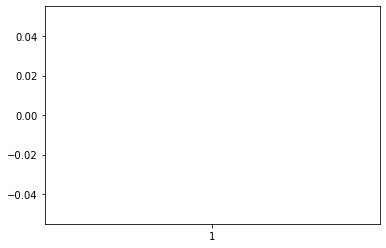

In [77]:
# plot the boxplot of "Autumn" column.
plt.boxplot(inp0['Autumn'])
plt.show()

Which of the following season has the highest difference between the maximum value and 99th quantile of sales?
- Winter
- Summer
- Spring
- Autumn


In [78]:
# Find the maximum and 99th percentile of Winter season.
print(inp0['Winter'].max()) 
print(inp0['Winter'].quantile(0.99))

x = inp0['Winter'].max() - inp0['Winter'].quantile(0.99)
x

20388.0
8697.0


11691.0

In [79]:
# Find the maximum and 99th percentile of Summer season.
print(inp0['Summer'].max()) 
print(inp0['Summer'].quantile(0.99))

x = inp0['Summer'].max() - inp0['Summer'].quantile(0.99)
x

35577
14149.0


21428.0

In [80]:
# Find the maximum and 99th percentile of Spring season.
print(inp0['Spring'].max()) 
print(inp0['Spring'].quantile(0.99))

x = inp0['Spring'].max() - inp0['Spring'].quantile(0.99)
x

7374
2844.0


4530.0

In [81]:
# Find the maximum and 99th percentile of Autumn season.
print(inp0['Autumn'].max()) 
print(inp0['Autumn'].quantile(0.99))

x = inp0['Autumn'].max() - inp0['Autumn'].quantile(0.99)
x

55532.0
23803.49000000016


31728.50999999984

## Bivariate Analysis 

### Numerical- Categorical analysis

Which of the following “Price” category has the lowest average value of rating?
- very-high
- Medium
- Low
- High


In [82]:
# Find the Mean of Ratings for each Price category.
inp0['Rating'].groupby(inp0['Price']).mean()

Price
Average    4.600000
High       2.150000
Low        3.491837
Name: Rating, dtype: float64

What is the median of the rating of “vintage” category in Style column?
- 4.6
- 4.7
- 4.55
- 0.00


In [84]:
# Find the median of Ratings for each Style category.
inp0['Rating'].groupby(inp0['Style']).median()

Style
Brief     4.5
Casual    4.6
Others    4.6
Sexy      4.4
cute      4.5
Name: Rating, dtype: float64

Which of the following season has the highest average value of sale for “Recommendation” value equals to 1.
- Summer
- Spring
- Autumn
- Winter


In [86]:
inp0['Recommendation'].groupby(inp0['Season']).mean()

Season
Autumn    0.166667
Spring    0.656250
Summer    0.275862
Winter    0.357143
Name: Recommendation, dtype: float64

### Categorical categorical bivariate analysis


Which of the following size categories has the highest positive recommendations?
- Medium and extra large
- Extra large and small
- Free and small
- Free and medium


In [89]:
# Size vs Recommendation.
inp0.groupby('Size')['Recommendation'].sum()

Size
Extra large     2
Free           17
Large           9
Medium         13
Small           0
Name: Recommendation, dtype: int64

### Multivariate analysis 

Which of the following pair of “Style” and “Price” category has the highest average of positive recommendations?
- Price: medium and style: vintage
- Price: medium and style: cute
- Price: very high and style: party
- Price: low and style: sexy


In [90]:
# plot the heat map of Style, price and Recommendation.
res = pd.pivot_table(data=inp0, index='Style', columns='Price', values='Recommendation')
res

Price,Average,High,Low
Style,,,
Brief,1.0,NaN,0.666667
Casual,NaN,NaN,0.312500
Others,NaN,NaN,0.444444
Sexy,NaN,NaN,0.363636
cute,NaN,0.5,0.555556


<AxesSubplot:xlabel='Price', ylabel='Style'>

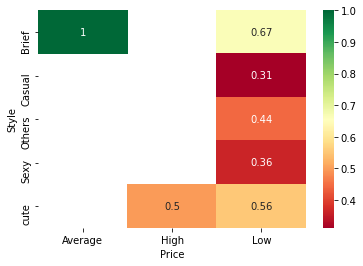

In [91]:
sns.heatmap(res, cmap='RdYlGn', annot=True)

Which of the following material type has no recommendation in summer and winter seasons?
- Mix and Milksilk
- Nylon and Rayon
- Microfiber and Silk
- Milksilk and Microfiber


<AxesSubplot:xlabel='Season', ylabel='Material'>

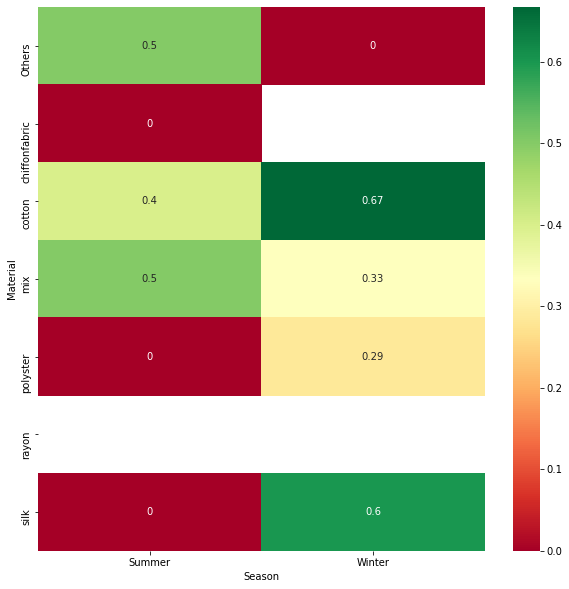

In [92]:
# plot the heat map of Season, material and Recommendation.
res = pd.pivot_table(data=inp0, index='Material', columns='Season', values='Recommendation')
plt.figure(figsize=[10,10])
sns.heatmap(res[['Summer','Winter']], cmap='RdYlGn', annot=True)